In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
data = pd.read_csv("bank-additional-full.csv", sep=";")
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
# Handling categorical data
for i in data.columns:
    data[i] = data[i].astype('category').cat.codes

data.head(10) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
5,28,7,1,2,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
6,42,0,1,5,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
7,24,1,1,7,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
8,7,9,2,5,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
9,8,7,2,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [100]:
# Split dataset in feature and target variable
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = data[feature_cols]
y = data.y

X

,age,job,marital,education,default,housing,loan
0,39,3,1,0,0,0,0
1,40,7,1,3,1,0,0
2,20,7,1,3,0,2,0
3,23,0,1,1,0,0,0
4,39,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0
41184,29,1,1,5,0,0,0
41185,39,5,1,6,0,2,0
41186,27,9,1,5,0,0,0


In [53]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 7)
(28831,)
(12357, 7)
(12357,)


In [91]:
# Create decision tree classifier object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [88]:
# Model Accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8822529740228211


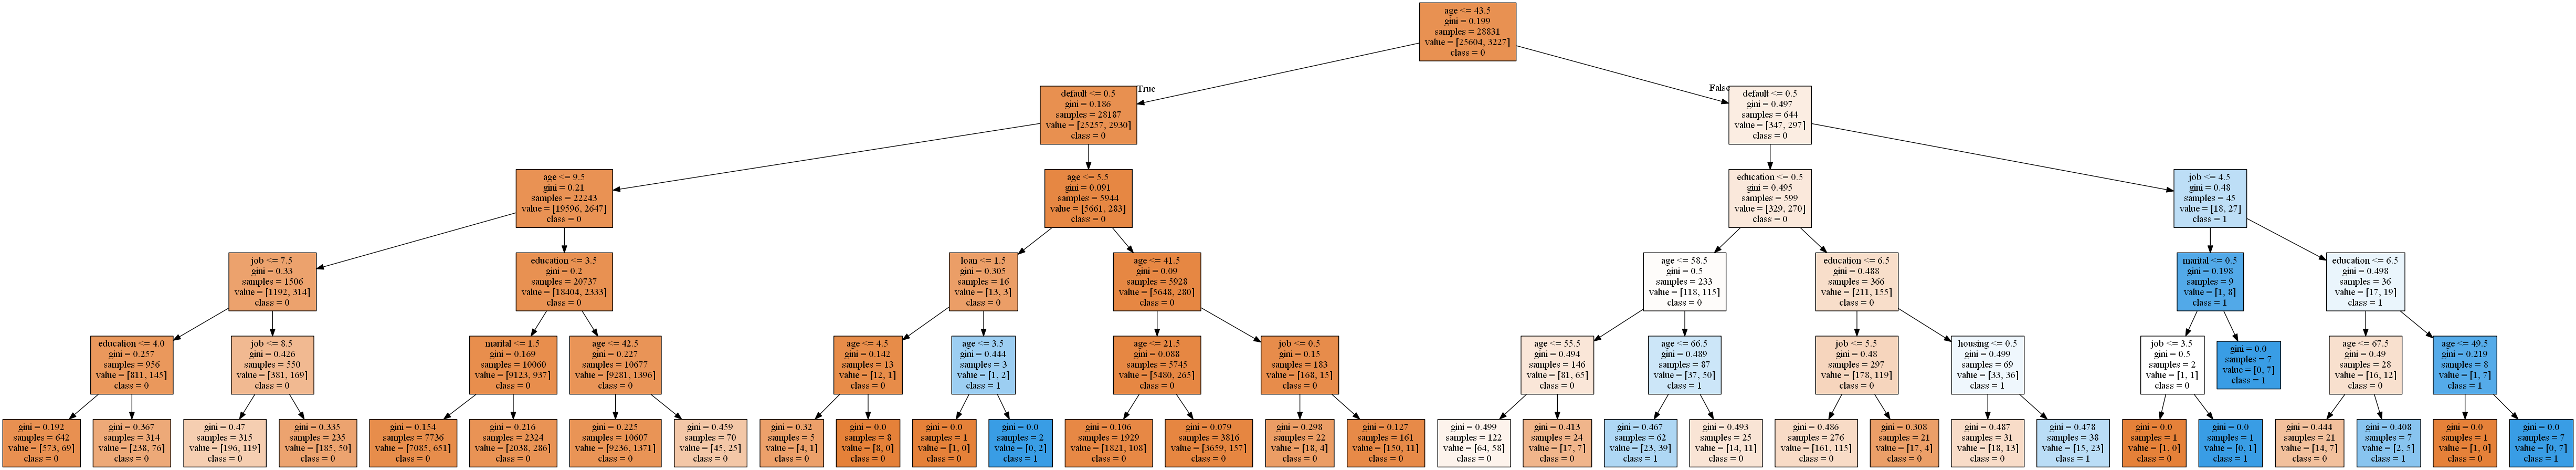

In [92]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names = feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('marketing.png')
Image(graph.create_png())

In [93]:
from sklearn.tree import export_text
r = export_text(clf, feature_names = feature_cols)
print(r)

|--- age <= 43.50
|   |--- default <= 0.50
|   |   |--- age <= 9.50
|   |   |   |--- job <= 7.50
|   |   |   |   |--- education <= 4.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- education >  4.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- job >  7.50
|   |   |   |   |--- job <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- job >  8.50
|   |   |   |   |   |--- class: 0
|   |   |--- age >  9.50
|   |   |   |--- education <= 3.50
|   |   |   |   |--- marital <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- marital >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- education >  3.50
|   |   |   |   |--- age <= 42.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  42.50
|   |   |   |   |   |--- class: 0
|   |--- default >  0.50
|   |   |--- age <= 5.50
|   |   |   |--- loan <= 1.50
|   |   |   |   |--- age <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  4.50
|   |   |   |   |   |--- class: 0
|   |  

In [86]:
from sklearn.metrics import classification_report

print("Evaluasi Model")

print(classification_report(y_test, y_pred))


Evaluasi Model
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10944
           1       0.47      0.02      0.04      1413

    accuracy                           0.89     12357
   macro avg       0.68      0.51      0.49     12357
weighted avg       0.84      0.89      0.84     12357

